In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import pingouin as pg
import scipy.stats as stats
import json

# from statsmodels.formula.api import ols
# from statsmodels.stats. weightstats import ttest_ind


In [3]:
merged_df = pd.read_csv("merged_df.csv")
chi_df = pd.read_csv(r"chicagorent.csv")
chimean_df = pd.read_csv("chicagomean.csv")

In [4]:
merged_df.head(3)

,prop_address_zipcode_1,pin,year,board_tot,board_tot_num
0,60618,13232020401002,2020,31000,31000
1,60618,14183000410000,2020,27239,27239
2,60618,13241190400000,2017,59315,59315


In [5]:
chi_df.head(3)

,Zip_Code,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
1,60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,...,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
2,60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,...,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0


In [6]:
chimean_df

,Unnamed: 0,60614,60647,60618,60625,60608,60624
0,2016-12-31,1829.000000,1587.333333,1447.833333,1284.750000,1305.666667,1193.916667
1,2017-12-31,1861.250000,1624.666667,1477.250000,1312.916667,1328.500000,1216.750000
2,2018-12-31,1889.916667,1667.083333,1511.583333,1339.083333,1381.166667,1251.500000
3,2019-12-31,1943.833333,1730.333333,1552.666667,1366.916667,1432.416667,1265.500000
4,2020-12-31,1927.000000,1717.833333,1559.666667,1374.750000,1433.166667,1286.916667
5,2021-12-31,1971.416667,1739.333333,1585.333333,1386.416667,1452.500000,1307.750000
6,2022-12-31,2150.500000,1866.166667,1676.500000,1462.500000,1535.833333,1360.500000


In [26]:
df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60608]
df_60608

,prop_address_zipcode_1,pin,year,board_tot,board_tot_num
34310,60608,17204020381002,2020,10558,10558
34311,60608,17204020381039,2020,27823,27823
34312,60608,17302000280000,2017,22260,22260
34313,60608,17301020180000,2020,21492,21492
34314,60608,17311140470000,2020,19192,19192
...,...,...,...,...,...
45832,60608,17293140310000,2019,27681,27681
45833,60608,17204100260000,2016,26705,26705
45834,60608,17293140010000,2018,46572,46572
45835,60608,17203050400000,2018,24148,24148


In [44]:
sorted60608_df=df_60608.groupby(by="year").mean()

sorted60608_df

,prop_address_zipcode_1,pin,board_tot,board_tot_num
year,,,,
2016,60608.0,1.713238e+13,25235.443032,25235.443032
2017,60608.0,1.715206e+13,26660.130075,26660.130075
2018,60608.0,1.716898e+13,26613.571975,26613.571975
2019,60608.0,1.713704e+13,34934.836695,34934.836695
2020,60608.0,1.713694e+13,31044.603919,31044.603919
2021,60608.0,1.624255e+13,9038.000000,9038.000000


https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html -->

AttributeError: 'AxesSubplot' object has no attribute 'unique'

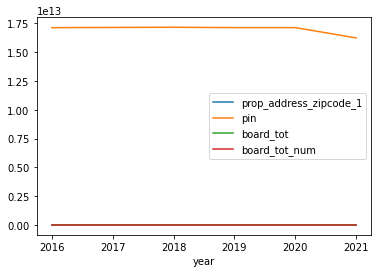

In [48]:
#60608


x= sorted60608_df.plot(use_index=True).unique
y= sorted60608_df["board_tot_num"]
# y_axis_sorted = y_axis_data.sort_index(ascending=False)
# changed this to yaxis_data, not sorted
plt.plot(x, y)

plt.show()

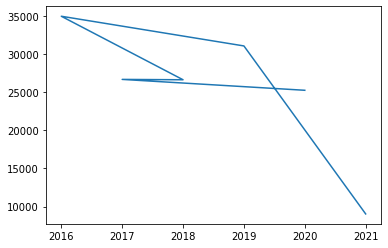

In [19]:
#60608

df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60608]
x_axis_data = df_60608["year"].unique()
y_axis_data = df_60608["board_tot"].groupby(df_60608["year"]).mean()
y_axis_sorted = y_axis_data.sort_index(ascending=False)
# changed this to yaxis_data, not sorted
plt.plot(x_axis_data, y_axis_data)

plt.show()

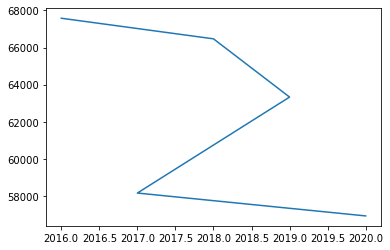

In [8]:
#60614

df_60614 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60614]
x_axis_data = df_60614["year"].unique()
y_axis_data = df_60614["board_tot"].groupby(df_60614["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

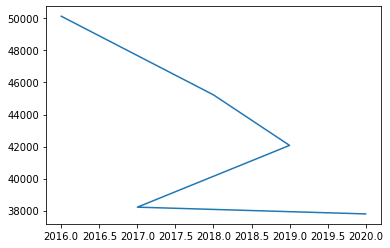

In [9]:
#60618

df_60618 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60618]
x_axis_data = df_60618["year"].unique()
y_axis_data = df_60618["board_tot"].groupby(df_60618["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

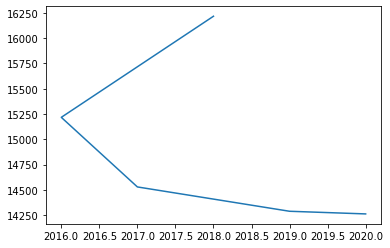

In [10]:
#60624

df_60624 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60624]
x_axis_data = df_60624["year"].unique()
y_axis_data = df_60624["board_tot"].groupby(df_60624["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

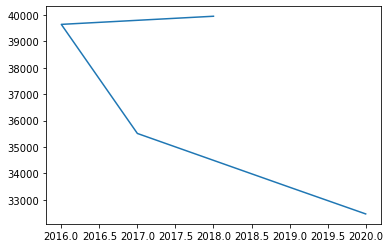

In [11]:
#60625

df_60625 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60625]
x_axis_data = df_60625["year"].unique()
y_axis_data = df_60625["board_tot"].groupby(df_60625["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

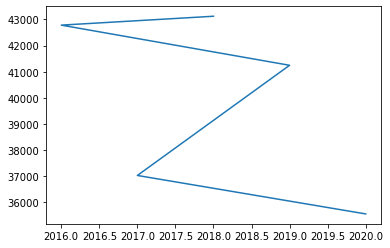

In [12]:
#60647

df_60647 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60647]
x_axis_data = df_60647["year"].unique()
y_axis_data = df_60647["board_tot"].groupby(df_60647["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()